In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import to_datetime
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import seaborn as sns
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


In [3]:
df = pd.read_csv("C:/Users/User/github/Quant/data/kospi_category.csv", encoding='cp949')
start_date = '2004-01'
end_date = '2020-03'
 
df['time'] = pd.date_range(start_date,end_date,freq='m')
df.drop('date',axis=1, inplace=True)
df.set_index('time', inplace=True) 

In [7]:
# train 데이터와 validation 데이터 나누기.
X_train = df[df.index < '2019-01-01']
X_valid = df[df.index >= '2019-01-01']

# 예측한 열만 필터링하기
nyc = X_train.iloc[:,0]
nyc_v = X_valid.iloc[:,0]

# 각 데이터의 사이즈 확인하기
print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_valid.shape)

X_train Shape (180, 22)
X_Valid Shape (14, 22)


import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

for param in pdq:
    try:
        model_arima = ARIMA(df.iloc[:,1],order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

In [70]:
arima_result = []

제조업 The MSE of auto-arima is: 163872.91121428582
음식료품 The MSE of auto-arima is: 217892.65631428588
섬유의복 The MSE of auto-arima is: 1328.645244256885
종이목재 The MSE of auto-arima is: 673.4758999999993
화학 The MSE of auto-arima is: 597510.5911293931
의약품 The MSE of auto-arima is: 6632770.821103824
비금속광물 The MSE of auto-arima is: 25201.94920714285
철강금속 The MSE of auto-arima is: 176468.05109999995
기계 The MSE of auto-arima is: 6352.646631102301
전기전자 The MSE of auto-arima is: 13933193.198438233
의료정밀 The MSE of auto-arima is: 178095.0531499999
운수장비 The MSE of auto-arima is: 19867.243414285687
유통업 The MSE of auto-arima is: 1392.6659785714296
전기가스업 The MSE of auto-arima is: 28600.046010183814
건설업 The MSE of auto-arima is: 270.99755714285703
운수창고업 The MSE of auto-arima is: 6077.740985714283
통신업 The MSE of auto-arima is: 2518.2309642857144
금융업 The MSE of auto-arima is: 1746.3765610696025
은행 The MSE of auto-arima is: 1195.217772020251
증권 The MSE of auto-arima is: 18167.096415562683
보험 The MSE of auto-a

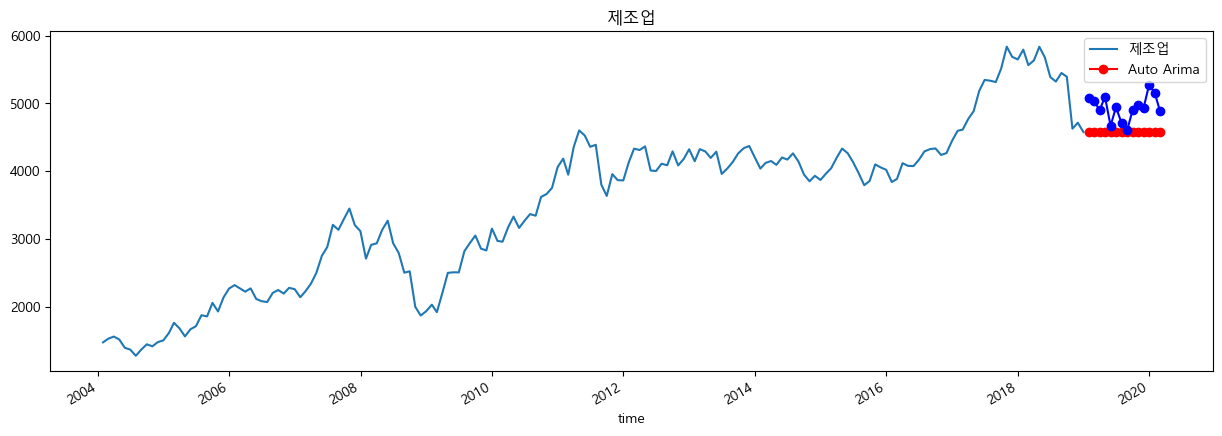

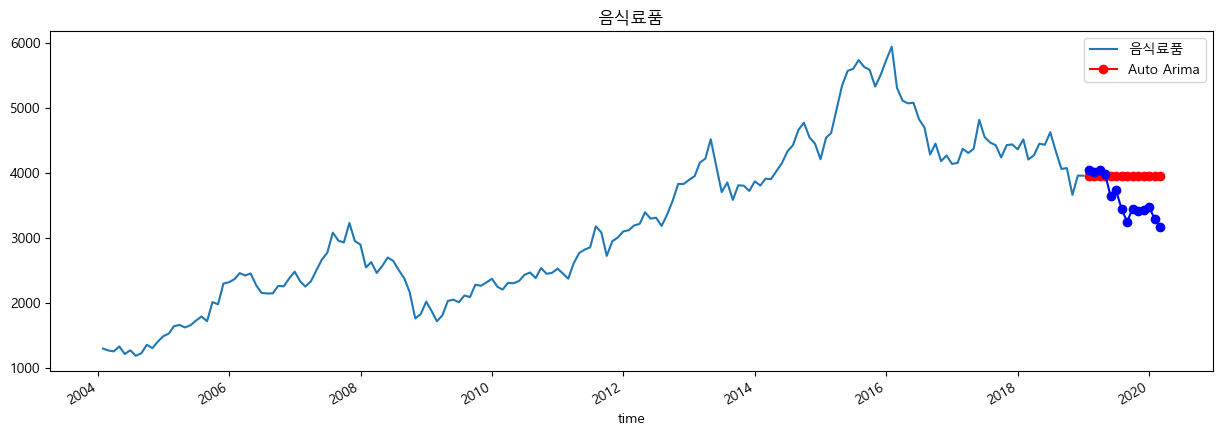

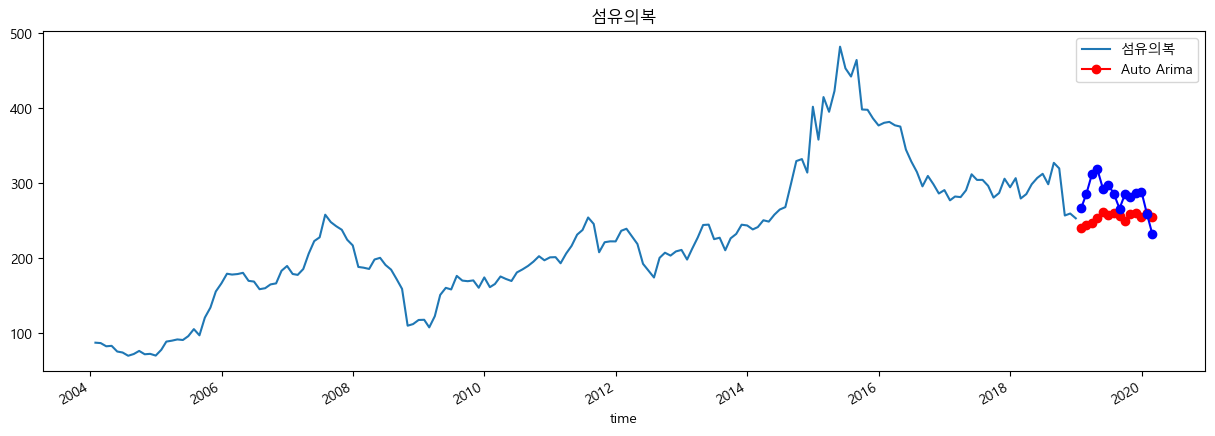

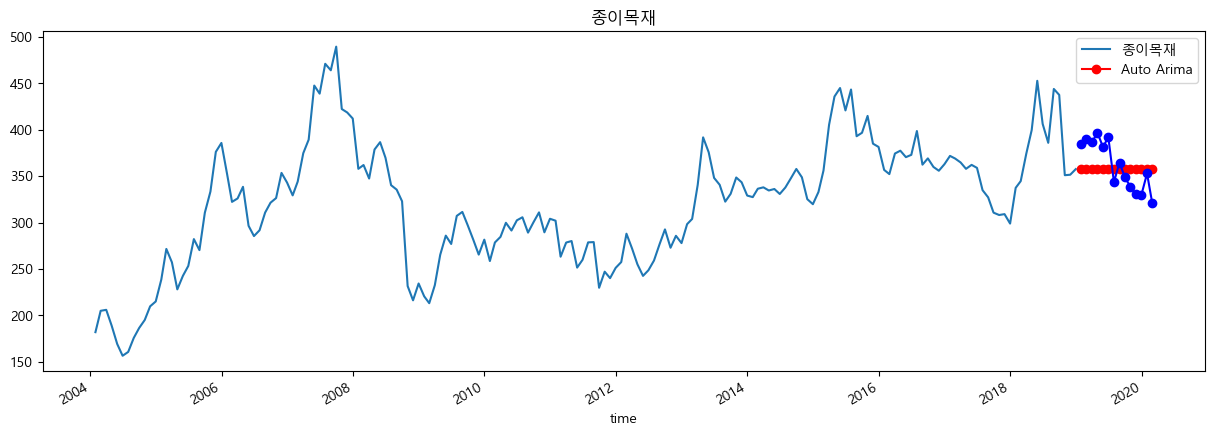

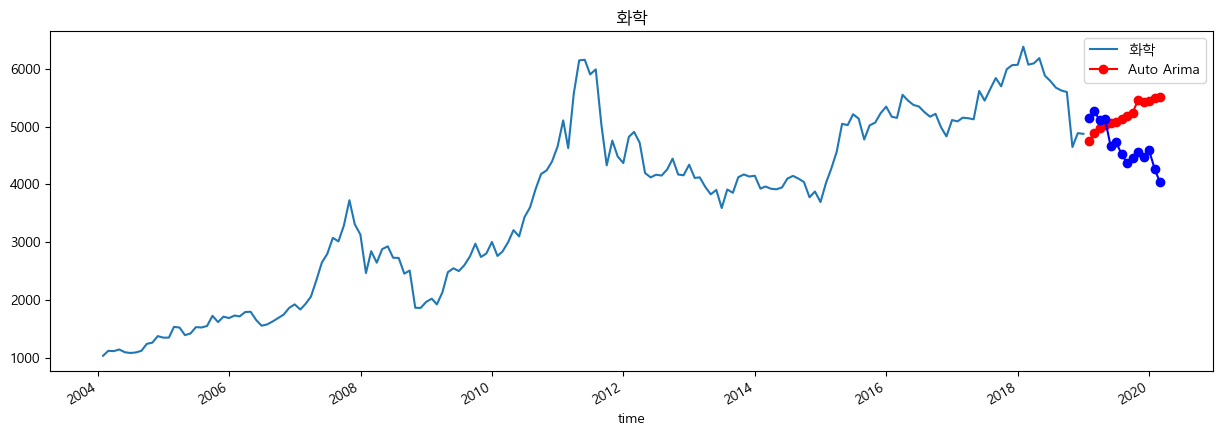

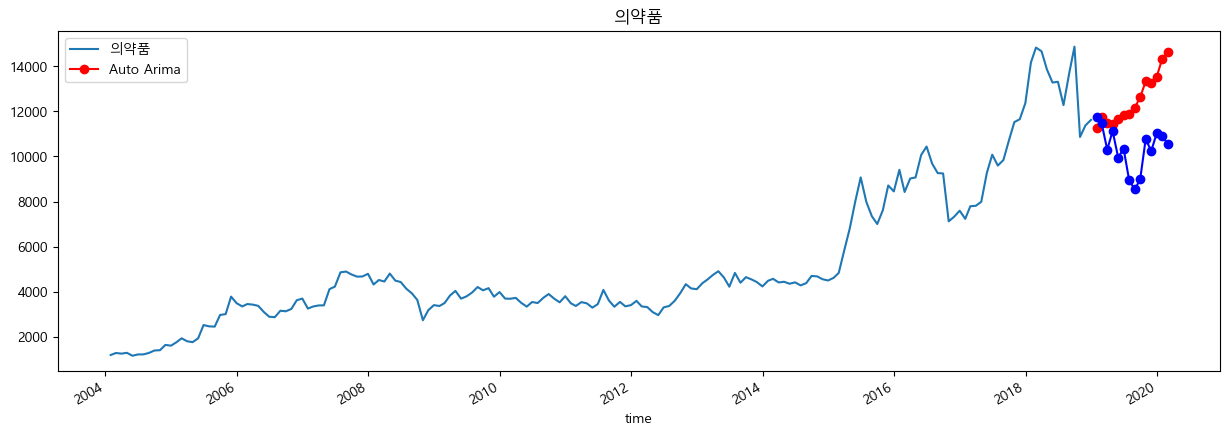

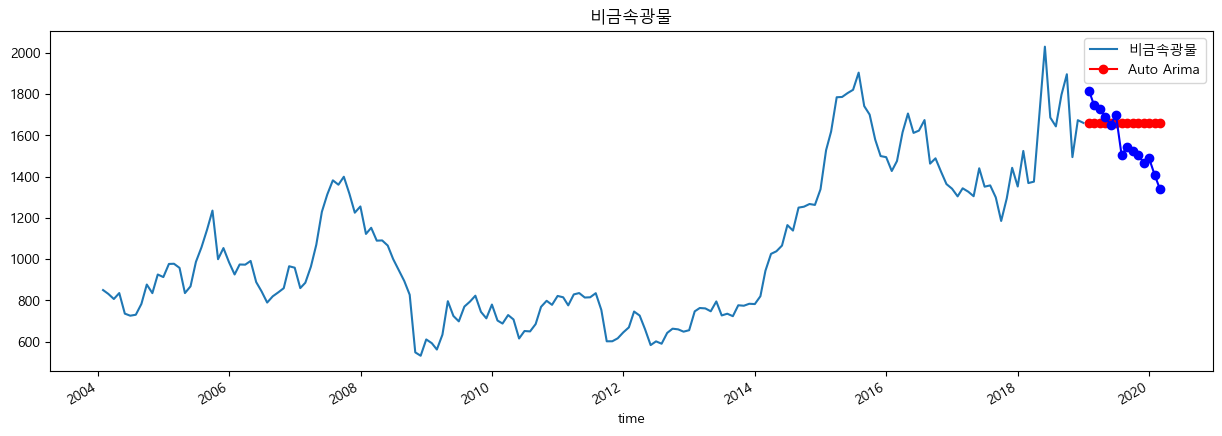

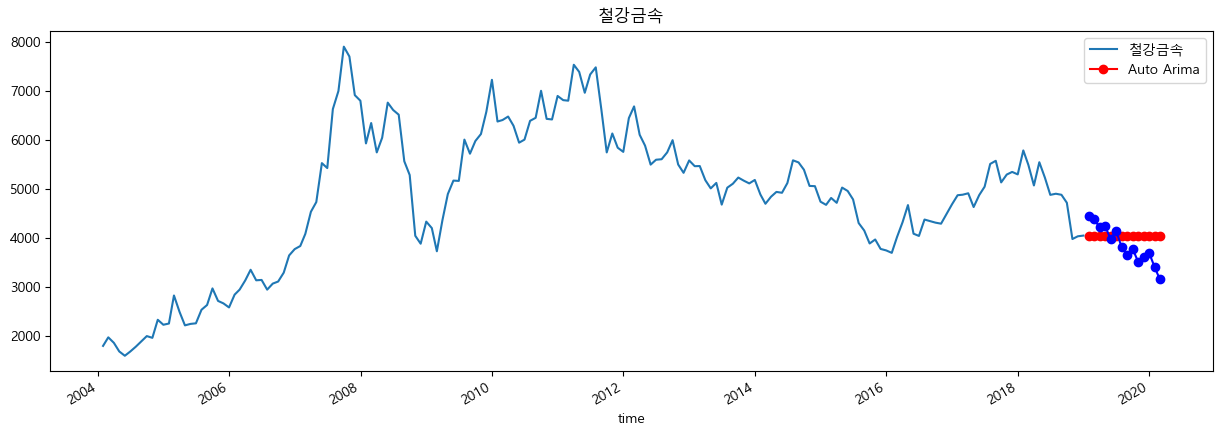

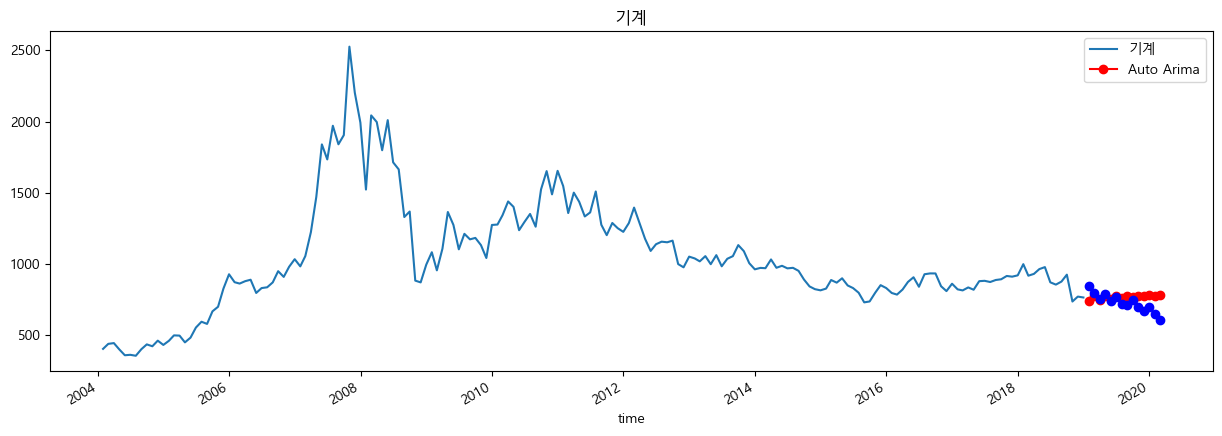

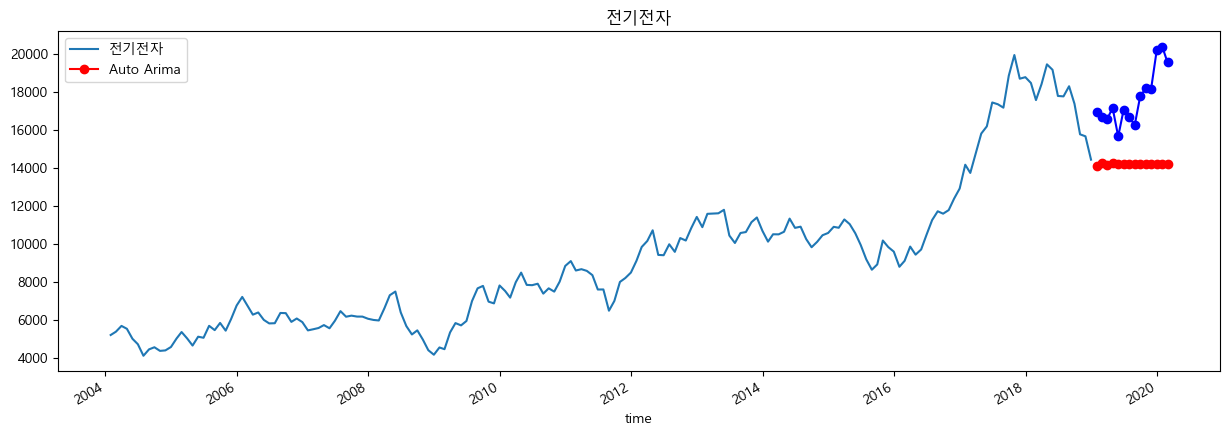

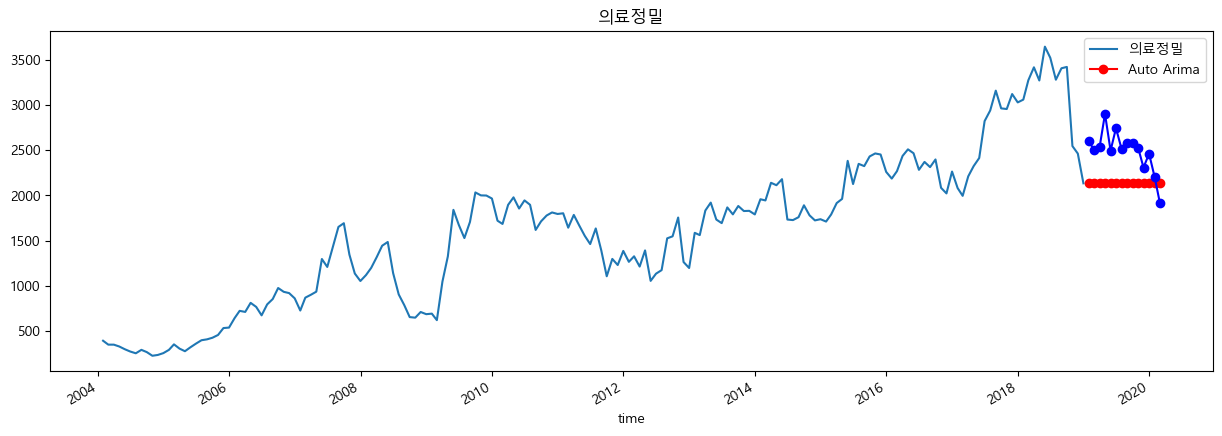

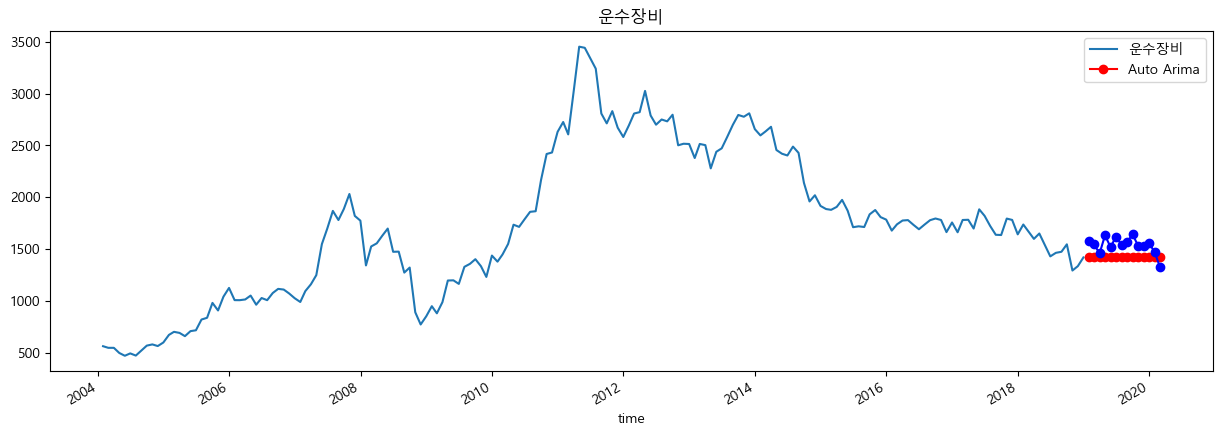

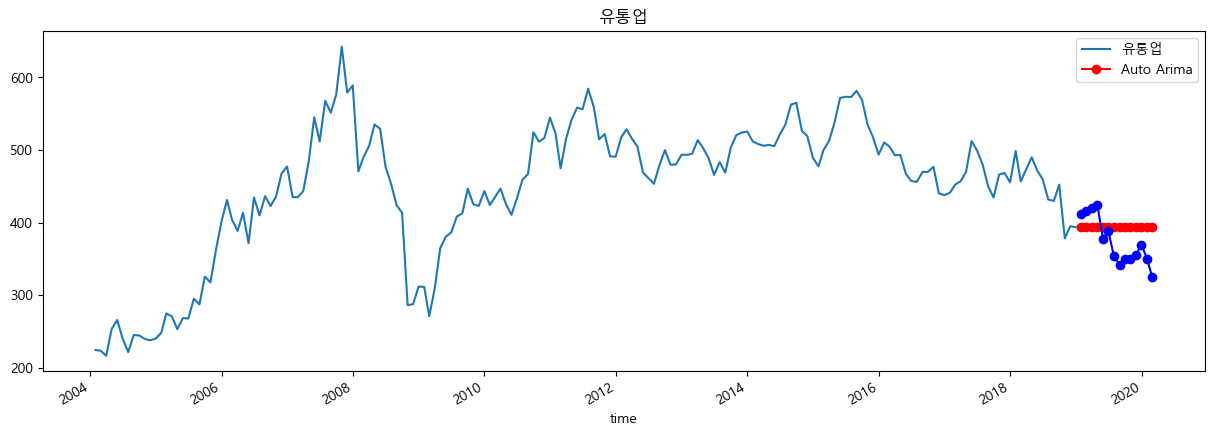

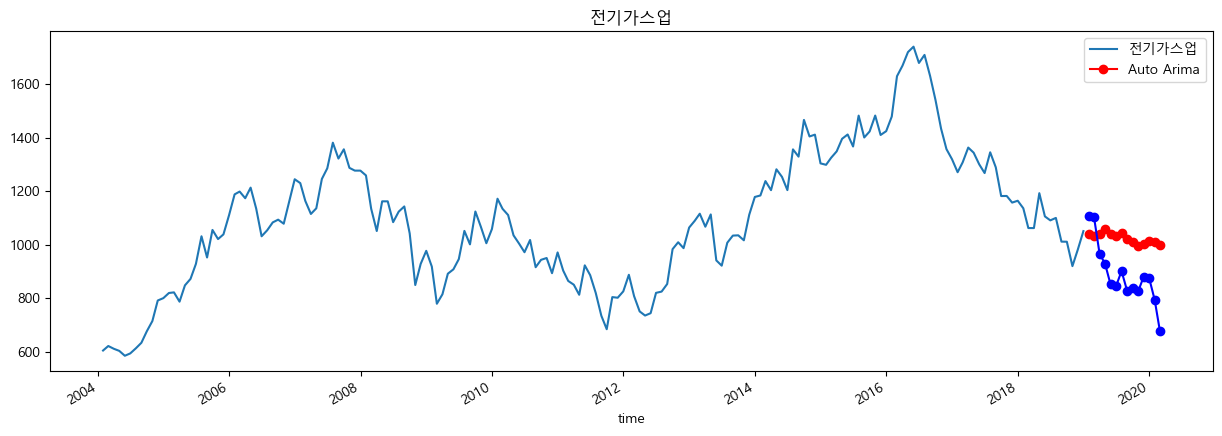

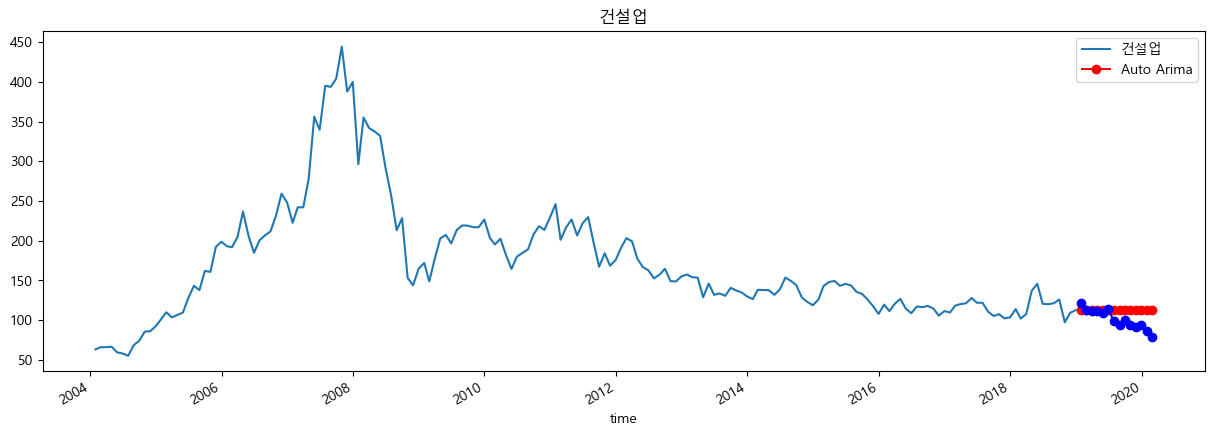

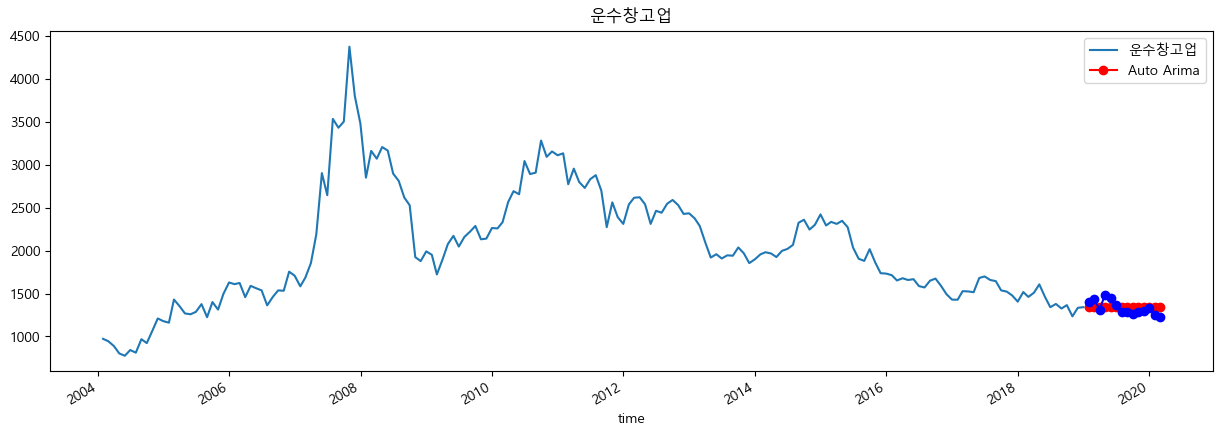

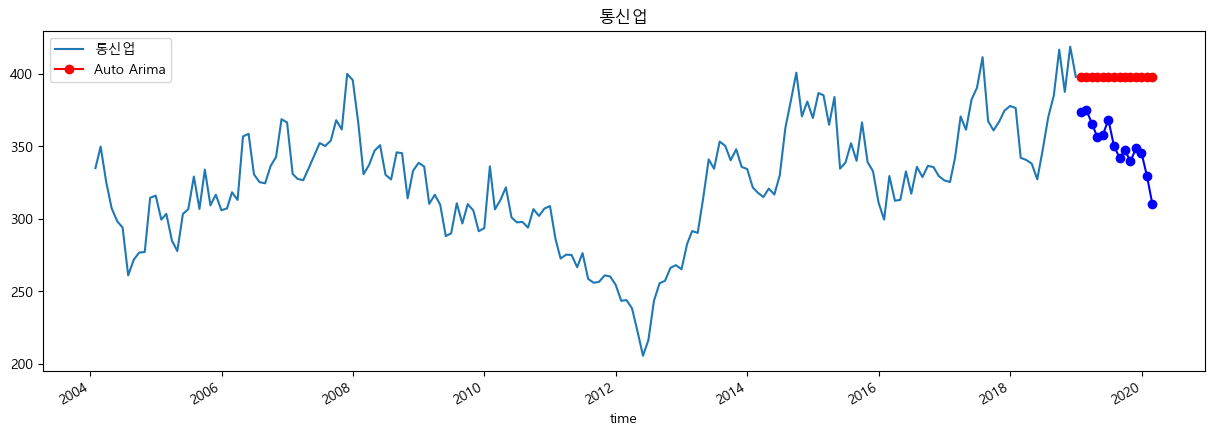

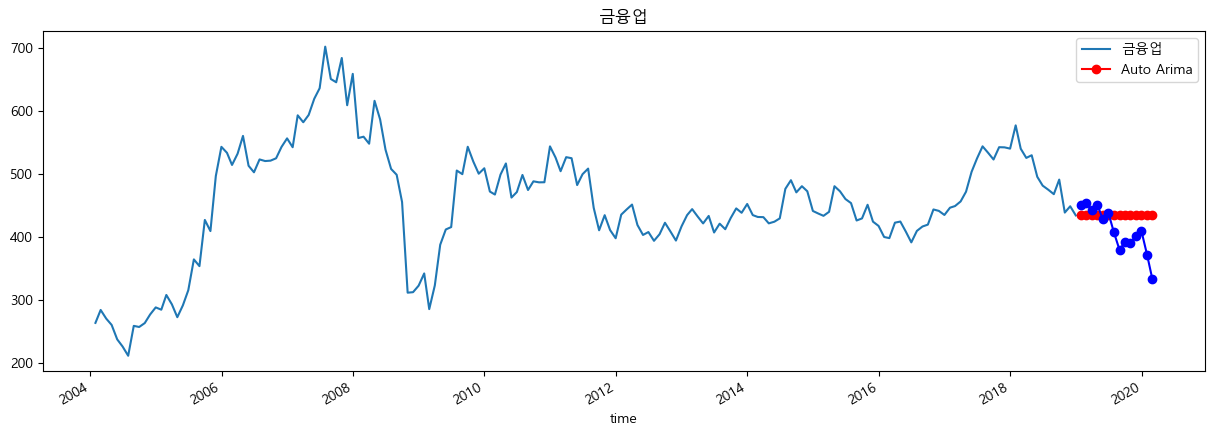

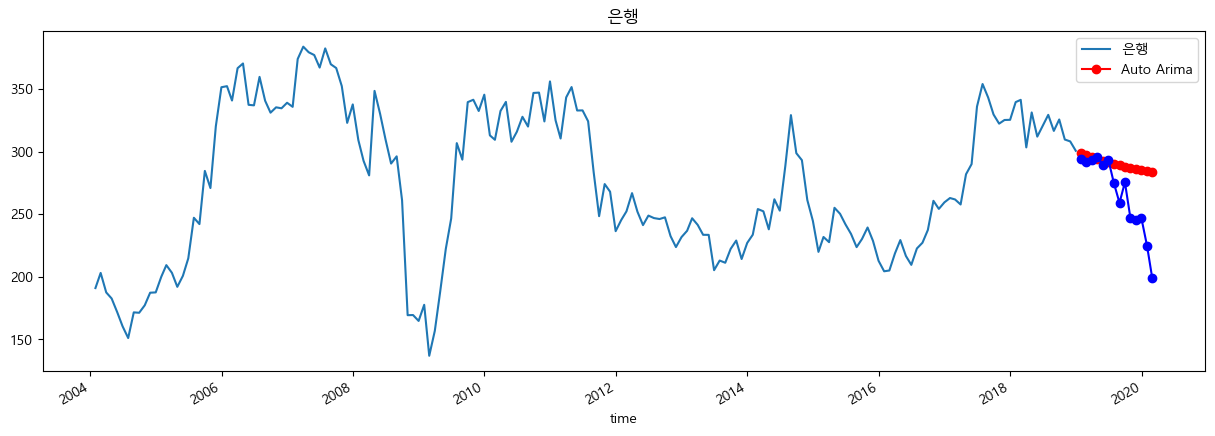

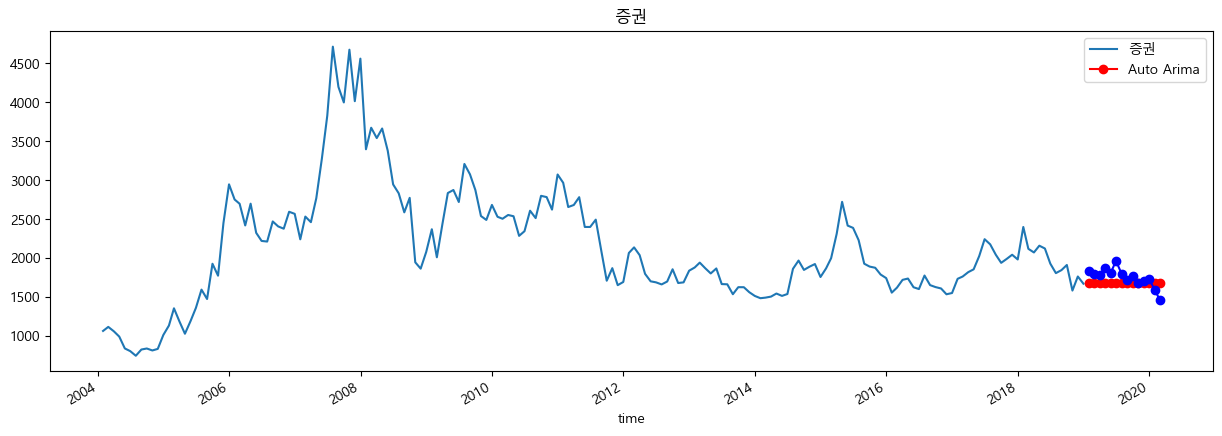

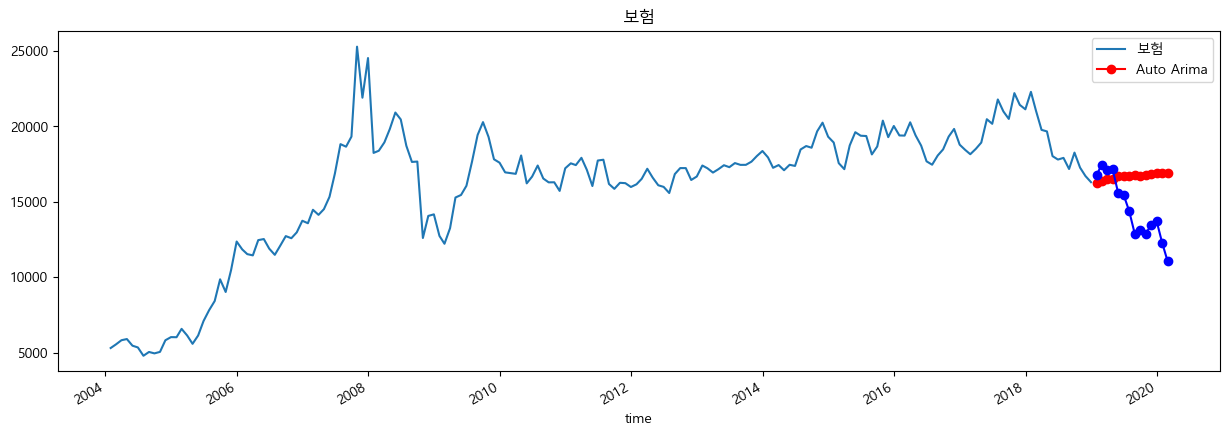

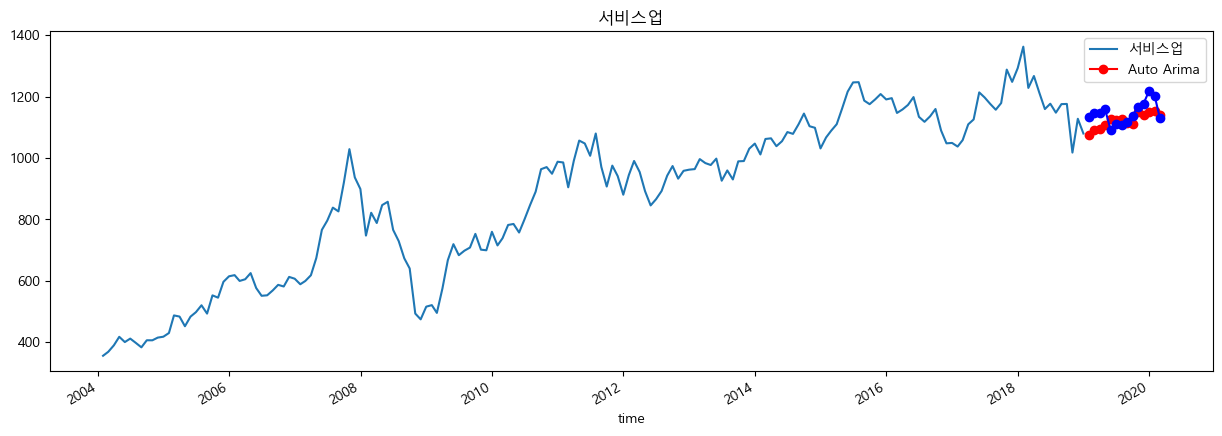

In [72]:
# Auto-ARIMA 돌리기 - 계측값이 일별이면 m=1, 월별이면 m=12, 주별이면 m=52, 
# 계절성이 있는 데이터면 seasonal=True 로 바꿔야함. 알아서 d 값을 찾아줌.
for i in range(len(df.columns)):
    auto_arima_model = pm.auto_arima(X_train.iloc[:,i], seasonal=True, m=12)
    fcast2 = auto_arima_model.predict(14) 
    fcast2 = pd.Series(fcast2, index = X_valid.index)
    fcast2 = fcast2.rename("Auto Arima")
    fig, ax = plt.subplots(figsize=(15,5))
    chart = sns.lineplot(data = pd.DataFrame(X_train.iloc[:,i]))
    
    chart.set_title(df.columns[i]+' Auto Arima')
    
    fcast2.plot(ax=ax, color='red', marker="o")
    plt.plot(X_valid.iloc[:,i], color = 'blue', marker = 'o')
    plt.title(df.columns[i])
    plt.legend()
    plt.savefig("C:/Users/User/github/Quant/data/"+df.columns[i]+" AutoArima_seasonal_O.png")
    print(df.columns[i]+' The MSE of auto-arima is:', mean_squared_error(X_valid.iloc[:,i].values, fcast2.values))
    arima_result.append( mean_squared_error(X_valid.iloc[:,i].values, fcast2.values))
    

In [77]:
total = pd.DataFrame(np.array(arima_result).reshape(22,2))

In [81]:
total['seasonal'] = total.iloc[:,0] < total.iloc[:,1]

In [83]:
total.index = df.columns

In [84]:
total

,0,1,seasonal
제조업,1.638729e+05,3.176372e+05,True
음식료품,1.670541e+03,6.734759e+02,False
섬유의복,1.804911e+05,2.493652e+06,True
종이목재,2.520195e+04,1.764681e+05,True
화학,6.352647e+03,1.393319e+07,True
의약품,1.780951e+05,1.986724e+04,False
비금속광물,1.392666e+03,3.878683e+04,True
철강금속,2.709976e+02,6.077741e+03,True
기계,2.518231e+03,1.746377e+03,False
전기전자,1.195218e+03,1.816710e+04,True


#### 계절성 O : 제조, 섬유의복, 종이목재, 화학, 비금속광물, 철강금속, 전기전자, 운수장비, 전기가스업, 건설업, 운수창고업, 금융업, 은행, 보험
#### 계절성 X : 음식료품, 의약품, 기계, 의료정밀, 유통업, 통신업, 증권, 서비스업